Reading Standard Workload File

In [1]:
FEATURES_NUMBER = 18
with open('test2.txt', 'r+', encoding='utf-8') as f:
    data = f.read().splitlines(True)
    
data = [ line.replace('\n', '').replace('\t', ' ').split() for line in data if not line.startswith(';')]
data = [[float(value) for value in line] for line in data if len(line) == FEATURES_NUMBER]
print(data[:10])
print(len(data))

[[1.0, 0.0, 3.0, 169.0, 1.0, 161.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0], [2.0, 0.0, 7.0, 56212.0, 1.0, 49351.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 2.0, 1.0, 2.0, -1.0, -1.0, -1.0, -1.0], [3.0, 1.0, 43.0, 2.0, 1.0, -1.0, 16777216.0, -1.0, -1.0, -1.0, 1.0, 3.0, 1.0, 3.0, -1.0, -1.0, -1.0, -1.0], [4.0, 1.0, 1967.0, 116.0, 1.0, 41.0, 4194304.0, -1.0, -1.0, -1.0, 1.0, 4.0, 2.0, 4.0, -1.0, -1.0, -1.0, -1.0], [5.0, 3.0, 9.0, 0.0, 1.0, -1.0, 2097152.0, -1.0, -1.0, -1.0, 0.0, 5.0, 1.0, 5.0, -1.0, -1.0, -1.0, -1.0], [6.0, 3.0, 11.0, 3.0, 1.0, 2.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 6.0, 1.0, 6.0, -1.0, -1.0, -1.0, -1.0], [7.0, 3.0, 9.0, 22.0, 1.0, 2.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 6.0, 1.0, 6.0, -1.0, -1.0, -1.0, -1.0], [8.0, 3.0, 8.0, 191.0, 1.0, 184.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0], [9.0, 4.0, 18.0, 3.0, 1.0, 2.0, 1048576.0, -1.0, -1.0, -1.0, 1.0, 6.0, 1.0, 6.0, -1.0, -1.0, -1.0, -1.0], [10.0, 4.0, 18.0, 11.0, 1

Converting it to pandas dataframe, removing not needed columns

In [3]:
import numpy as np
import pandas as pd

np_data = np.array(data, dtype=int)
print(np_data.shape)

labels = ['submit time', 'wait time', 'run time', 'cpu used', 'memory used','user id']
np_data = np.delete(np_data, [0, 4, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17], 1)
print(np_data.shape)
print(len(labels))
df = pd.DataFrame(np_data, columns=labels)
print(df.head())
train_data = df.iloc[1000:, :]

(13085792, 18)
(13085792, 6)
6
   submit time  wait time  run time  cpu used  memory used  user id
0            0          3       169       161      1048576        1
1            0          7     56212     49351      1048576        2
2            1         43         2        -1     16777216        3
3            1       1967       116        41      4194304        4
4            3          9         0        -1      2097152        5


In [19]:
train_data_with_count = train_data.copy()
train_data_with_count['count'] = train_data_with_count.groupby('user id')['user id'].transform('count')
train_data_with_count

,submit time,wait time,run time,cpu used,memory used,user id,count
1000,240,8,126,101,2097152,31,58499
1001,240,8,131,107,2097152,31,58499
1002,240,8,134,103,2097152,31,58499
1003,240,8,134,111,2097152,31,58499
1004,240,8,152,117,2097152,31,58499
...,...,...,...,...,...,...,...
13085787,2591979,12,0,-1,4194304,164,1837466
13085788,2591990,8,0,-1,4194304,23,2147951
13085789,2591991,5,0,-1,4194304,23,2147951
13085790,2591991,6,0,-1,4194304,23,2147951


Grouping by user id

In [20]:
grouped = train_data_with_count.groupby('user id').mean()
grouped.pop('wait time')
grouped.pop('submit time')
grouped

,run time,cpu used,memory used,count
user id,,,,
1,423.806991,208.647189,1.048576e+06,15419.0
2,38631.229706,30814.811832,1.053782e+06,47330.0
3,654.485383,119.007762,1.677761e+07,15975.0
4,1810.367628,932.234699,2.522629e+06,9885.0
5,3708.320135,1922.559434,2.198249e+06,46093.0
...,...,...,...,...
1610,689.571429,475.500000,4.194304e+06,14.0
1611,86.500000,81.000000,1.258291e+07,2.0
1612,0.000000,-1.000000,3.355443e+07,7.0


Data preprocessing

In [29]:
from sklearn import preprocessing
user_profiles = grouped.to_numpy()
scaler = preprocessing.StandardScaler().fit(user_profiles)
user_profiles = scaler.transform(user_profiles)
user_profiles[:10]

array([[-0.24610212, -0.19995672, -0.68999839,  0.07894802],
       [ 0.45873125,  0.35295244, -0.68944983,  0.4234954 ],
       [-0.24184667, -0.20157608,  0.967274  ,  0.08495123],
       [-0.22052347, -0.1868849 , -0.53468643,  0.01919668],
       [-0.1855109 , -0.1689944 , -0.56886434,  0.41013934],
       [-0.25128676, -0.20177816, -0.67911508,  0.02459524],
       [-0.15349029, -0.11004701, -0.65445223,  0.29141405],
       [-0.08966462, -0.05346037, -0.60255951, -0.02655078],
       [ 3.06310128,  2.01854111, -0.36243382, -0.07093781],
       [-0.12091483, -0.08213769, -0.37778628, 10.13807733]])

Visualizing data

In [22]:
import matplotlib.pyplot as plt
def plot_2d_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(12, 12)
    plt.prism()
    
    for i in np.unique(y):
        cluster = (y == i)

        dim0 = X[cluster, 0]
        dim1 = X[cluster, 1]
        label = f"Cluster {i}"
        plot.scatter(dim0, dim1, label=label)
    
    plot.set_xticks(())
    plot.set_yticks(())

    plt.title("Workload logs")
    plt.tight_layout()
    plt.legend()
    plt.show()

In [30]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

def visualize_clustered_data(data):
    kmeans = KMeans(n_clusters=4).fit(data)
    tsne = TSNE(n_components=2, metric='euclidean', perplexity=500).fit_transform(data)
    plot_2d_scatter(tsne, kmeans.labels_)
    return kmeans.labels_

/Users/jakubmysliwiec/.asdf/installs/python/3.10.2/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jakubmysliwiec/.asdf/installs/python/3.10.2/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


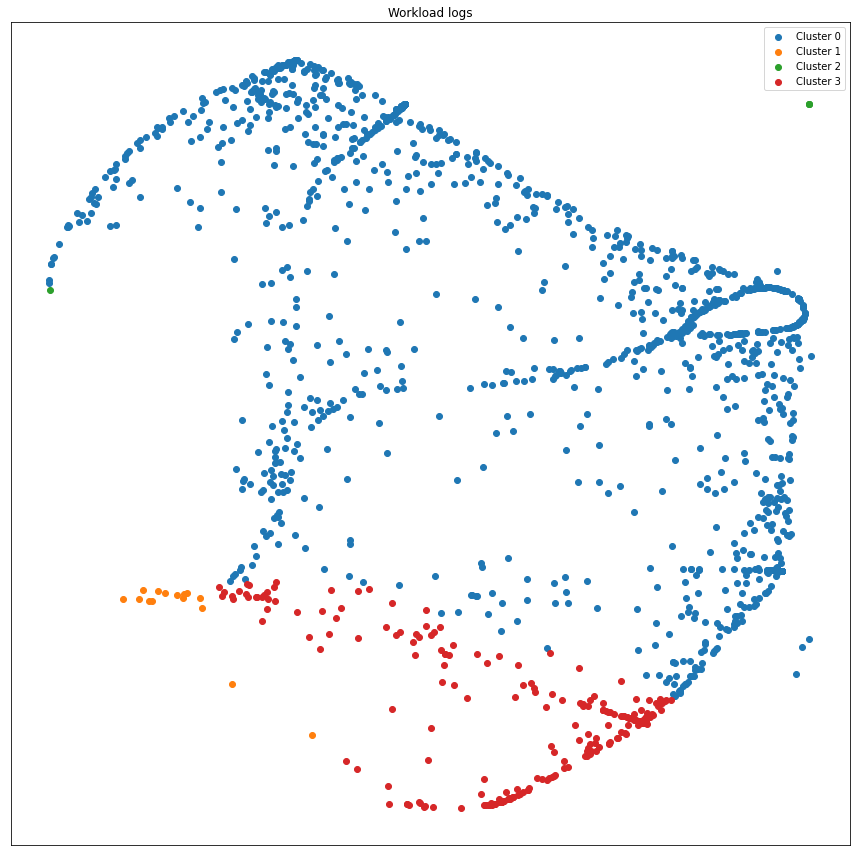

In [31]:
labels = visualize_clustered_data(user_profiles)

In [32]:
grouped[labels == 0]

,run time,cpu used,memory used,count
user id,,,,
1,423.806991,208.647189,1.048576e+06,15419.0
2,38631.229706,30814.811832,1.053782e+06,47330.0
4,1810.367628,932.234699,2.522629e+06,9885.0
5,3708.320135,1922.559434,2.198249e+06,46093.0
6,142.759461,107.821955,1.151869e+06,10385.0
...,...,...,...,...
1608,71.484536,29.340206,9.166932e+06,97.0
1610,689.571429,475.500000,4.194304e+06,14.0
1611,86.500000,81.000000,1.258291e+07,2.0


In [33]:
grouped[labels == 1]

,run time,cpu used,memory used,count
user id,,,,
100,3.187791e+05,2.942063e+05,2.097152e+06,1436.0
291,5.071584e+05,1.027000e+05,4.194304e+06,701.0
648,1.024945e+06,1.685586e+06,2.097152e+06,2.0
676,3.490110e+05,1.049758e+05,1.677722e+07,4.0
936,6.828710e+05,4.118980e+05,1.342177e+08,1.0
981,4.863820e+05,4.905555e+05,1.677722e+07,2.0
985,2.674299e+05,2.618954e+05,2.414902e+06,33.0
1004,7.544450e+05,2.313400e+04,4.194304e+06,1.0
1059,1.928364e+05,2.764582e+05,6.710886e+07,5.0


In [34]:
grouped[labels == 2]

,run time,cpu used,memory used,count
user id,,,,
10,7209.926670,6730.49355,4.011755e+06,947067.0
23,0.007581,-1.00000,4.194304e+06,2147951.0
29,18.623459,16.94539,2.481680e+06,2115186.0
164,0.000000,-1.00000,4.194304e+06,1837466.0


In [39]:
grouped[labels == 0]['run time'].mean()

6379.76525239558

In [42]:
for index, row in grouped[labels == 2].iterrows():
    print(index)
    print(row)

10
run time       7.209927e+03
cpu used       6.730494e+03
memory used    4.011755e+06
count          9.470670e+05
Name: 10, dtype: float64
23
run time       7.580713e-03
cpu used      -1.000000e+00
memory used    4.194304e+06
count          2.147951e+06
Name: 23, dtype: float64
29
run time       1.862346e+01
cpu used       1.694539e+01
memory used    2.481680e+06
count          2.115186e+06
Name: 29, dtype: float64
164
run time             0.0
cpu used            -1.0
memory used    4194304.0
count          1837466.0
Name: 164, dtype: float64
